<a href="https://colab.research.google.com/github/100mya/Cartoonify-images-using-machine-learning/blob/main/Cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
num_down = 2
num_bilateral = 7

In [ ]:
img_rgb = cv2.imread("Soumya11.JPG")
print(img_rgb.shape)

(799, 800, 3)


In [ ]:
img_rgb = cv2.resize(img_rgb,(800,800))

In [ ]:
img_color = img_rgb
for _ in range(num_down):
  img_color = cv2.pyrDown(img_color)

In [ ]:
for _ in range(num_bilateral):
  img_color = cv2.bilateralFilter(img_color, d = 9, sigmaColor = 9, sigmaSpace = 7) 

In [ ]:
for i in range(num_down):
  img_color = cv2.pyrUp(img_color)

In [ ]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)
img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize = 9, C = 2)

In [ ]:
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2BGR)
img_cartoon = cv2.bitwise_and(img_color, img_edge)

In [ ]:
stack = np.hstack([img_rgb, img_cartoon])
#cv2.imshow('Stacked Images', stack)

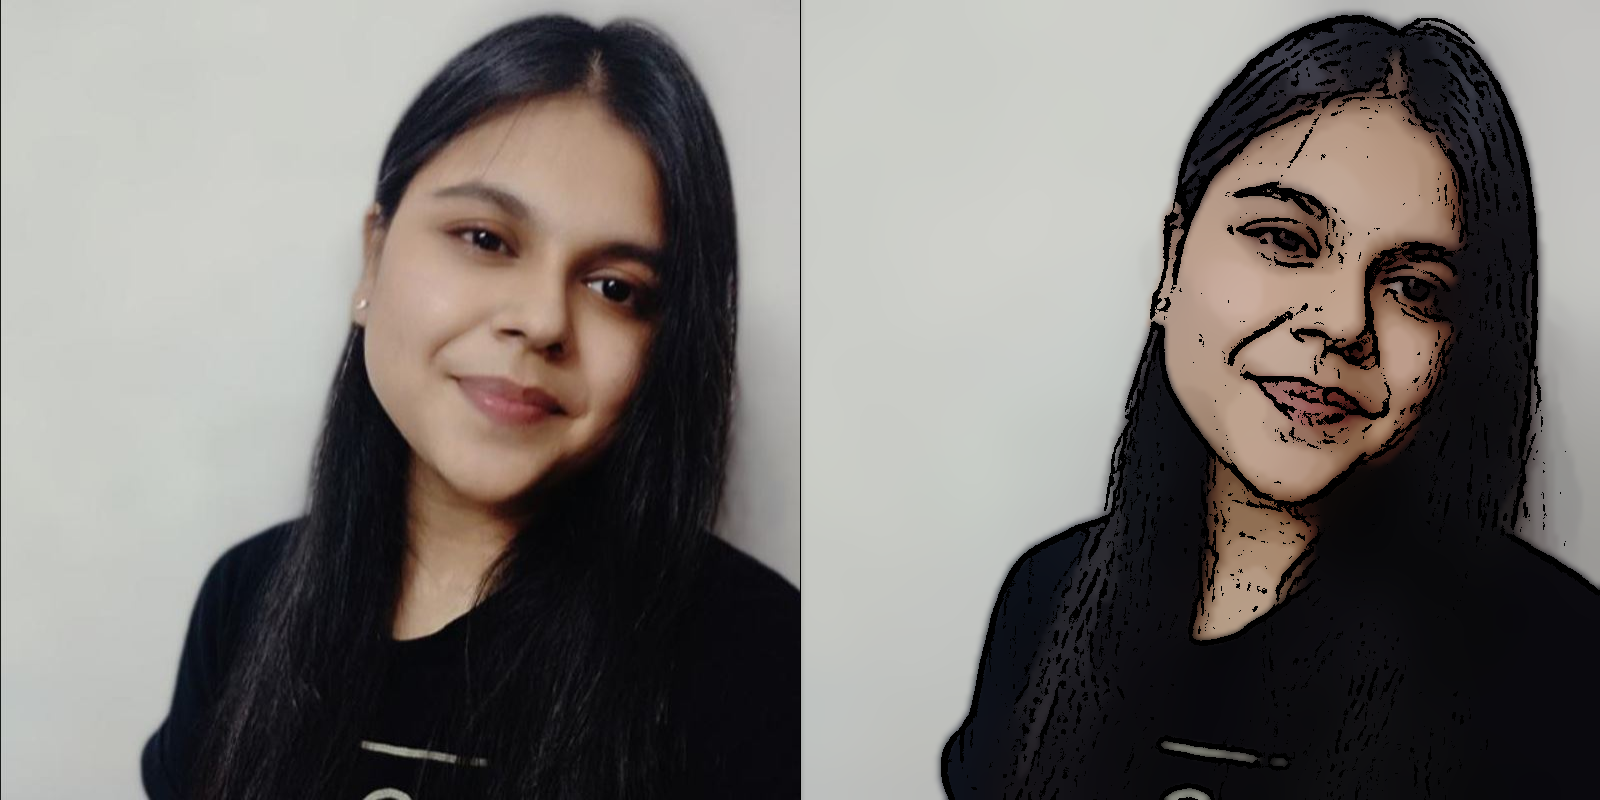

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(stack)